In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
import helper_functions1 as hf

In [2]:
# load dataframe 
bikes_df = pd.read_pickle('cleaned_data/bikes_regression.pkl')
# initialize class
bikes_time = hf.TimeSeries(bikes_df,'cnt')
bikes_time_df = bikes_time.create_timeseries()

In [3]:
# monthly rental 
monthly_cnt = bikes_time.plot_time_monthly()

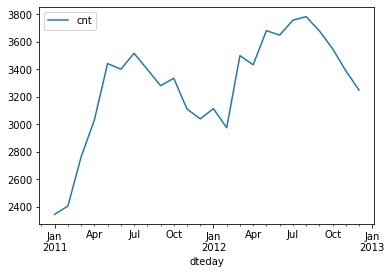

In [4]:
monthly_cnt.plot()

### trends:

- appears to increase from 2011 to 2013 
- appears to have seasonality of increase from Jan to July then decline from July to Jan 

<Figure size 432x288 with 0 Axes>

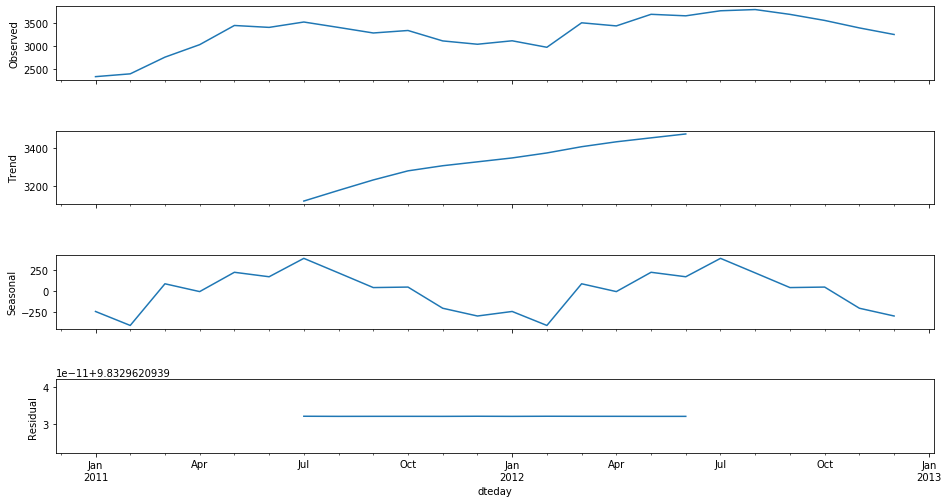

In [5]:
bikes_time.generate_decomp()

In [6]:
# create train, test 
train, test = bikes_time.generate_train_test(bikes_time_df)

In [7]:
pdq, pdqs = bikes_time.generate_combo()

In [ ]:
# bikes_time.model_parameter_tuning(pdq,pdqs)

In [8]:
# get forecast
final_model = bikes_time.sarimax_model(train,(1,0,1),(1,1,1,12))
pred = bikes_time.forecast(final_model,test)

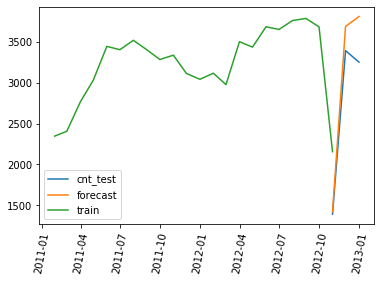

In [9]:
bikes_time.plot_finalresults(test,train)